# **Customer Segmentation**

**Subject:** BADS7105 - CRM Analytics and Intelligence

**Student:** Pawarut Kongratana (6210422006)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler

In [7]:
df = pd.read_csv('query.csv')
df.head(3)

,CUST_CODE,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13


# Clustering Model

In [8]:
Features = ['AVG_MONTHLY_SPEND','STD_MONTHLY_SPEND','AVG_MONTHLY_VISIT','STD_MONTHLY_VISIT','MODE_BASKET_SIZE','CUST_LIFETIME','DURATION_FROM_LAST_PURCHASE']

X = df[Features]
X_std = pd.DataFrame(StandardScaler().fit_transform(X))

Text(0, 0.5, 'Silhouette Score')

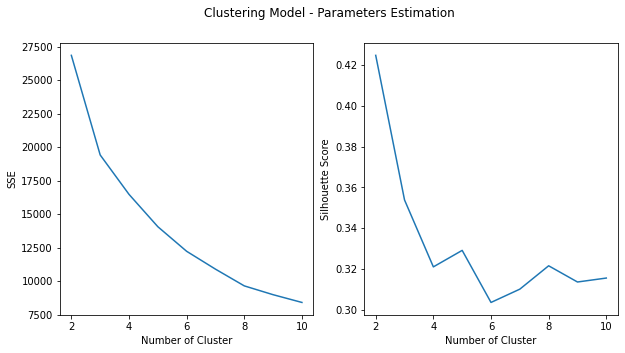

In [9]:
sse = []
sil = []
n = range(2, 11)

for i in n:
  kmeans = KMeans(n_clusters=i, n_init=50).fit(X_std)
  sse.append(kmeans.inertia_)
  sil.append(silhouette_score(X_std, kmeans.labels_, metric='euclidean'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Clustering Model - Parameters Estimation')

ax1.plot(n, sse)
ax1.set_xlabel('Number of Cluster')
ax1.set_ylabel('SSE')

ax2.plot(n, sil)
ax2.set_xlabel('Number of Cluster')
ax2.set_ylabel('Silhouette Score')

In [10]:
df_cluster = df.copy()
df_cluster['CLUSTER'] = KMeans(n_clusters=3, n_init=50, random_state=10).fit_predict(X_std)
df_cluster.head(3)

,CUST_CODE,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE,CLUSTER
0,CUST0000000181,2.44,2.440000,0.000000,1,1.000000,0.000000,1,0,547,547,0
1,CUST0000000369,26861.24,34.261786,20.446128,220,7.857143,3.388155,2,811,812,1,2
2,CUST0000000689,2957.13,36.507778,36.112964,16,1.777778,1.227262,3,337,350,13,1


# Feature Importance


<AxesSubplot:title={'center':'Repeat-Purchase Customers - Feature Importance'}, ylabel='Feature'>

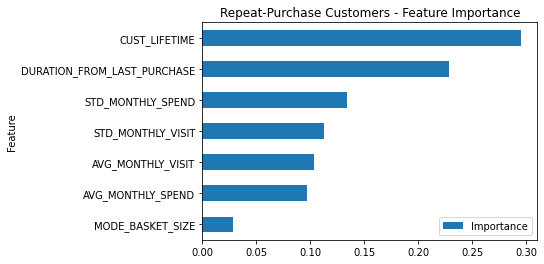

In [11]:
X = df_cluster[Features]
y = df_cluster['CLUSTER']

clf = RandomForestClassifier(criterion = 'entropy').fit(X, y)

df_importance = pd.DataFrame({'Feature': Features, 'Importance' : clf.feature_importances_}).set_index('Feature')
df_importance.sort_values('Importance').plot.barh(title='Repeat-Purchase Customers - Feature Importance')

# EDA

<ipython-input-12-1e08286e25e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda.sort_values(by=['CLUSTER'], inplace=True)
c:\users\pawarutk\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


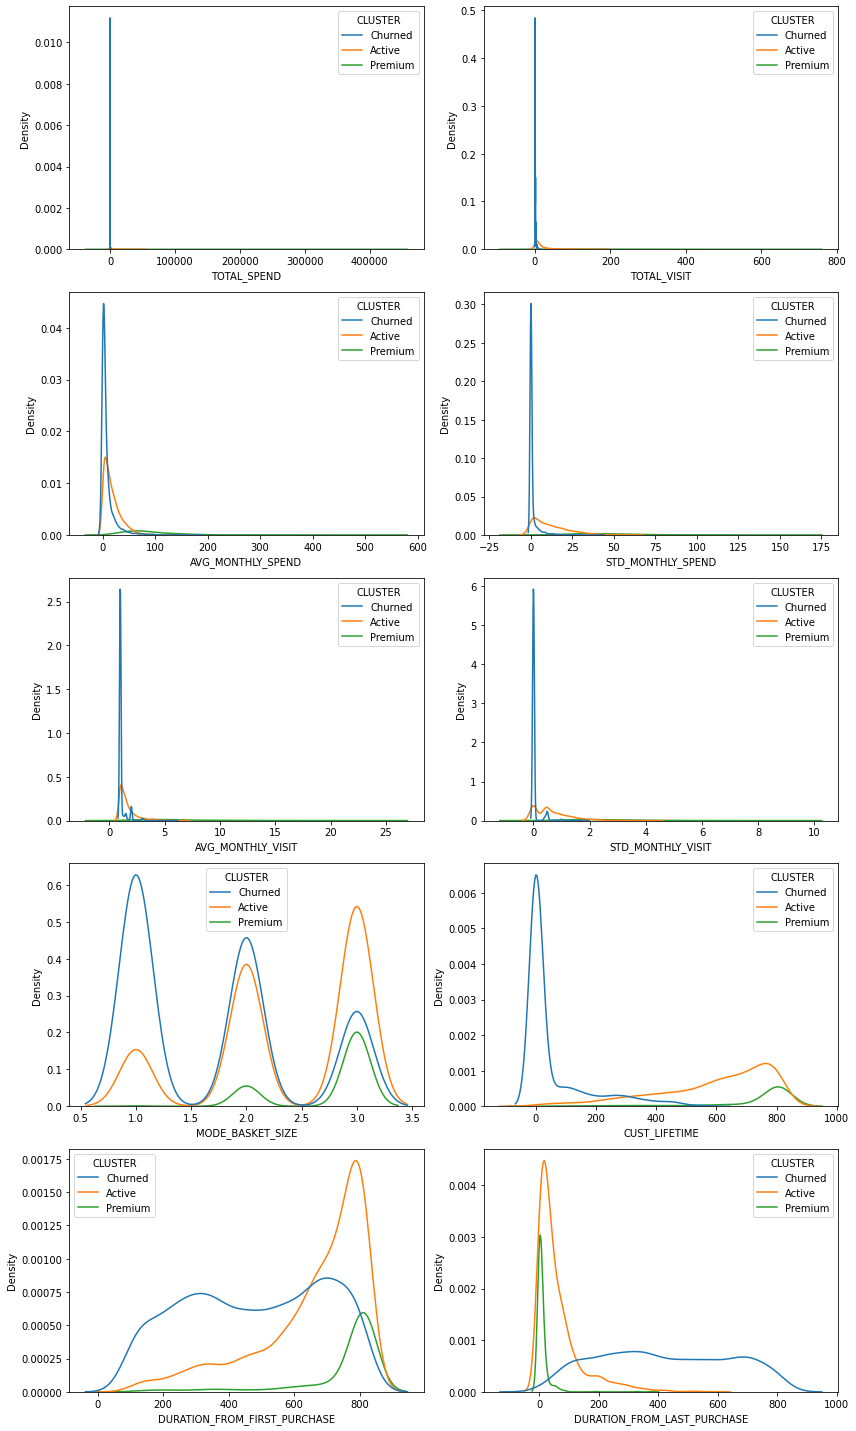

In [12]:
df_eda = df_cluster[['CLUSTER','TOTAL_SPEND','TOTAL_VISIT','AVG_MONTHLY_SPEND','STD_MONTHLY_SPEND','AVG_MONTHLY_VISIT',
                     'STD_MONTHLY_VISIT','MODE_BASKET_SIZE','CUST_LIFETIME','DURATION_FROM_FIRST_PURCHASE','DURATION_FROM_LAST_PURCHASE']]
df_eda.sort_values(by=['CLUSTER'], inplace=True)
df_eda['CLUSTER'].replace({0:'Churned',1:'Active',2:'Premium'}, inplace=True)

fig, axes = plt.subplots(5, 2, figsize=(12, 20), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(df_eda.iloc[:,1:].columns, axes):
  sns.kdeplot(data=df_eda, x=col, hue='CLUSTER', palette='tab10', ax=ax)

plt.show()

# Result

In [13]:
df_interpret = df_cluster.groupby('CLUSTER', as_index=False).mean()
df_interpret['NO_CUST'] = df_cluster[['CLUSTER','CUST_CODE']].groupby('CLUSTER').count()

df_interpret

,CLUSTER,TOTAL_SPEND,AVG_MONTHLY_SPEND,STD_MONTHLY_SPEND,TOTAL_VISIT,AVG_MONTHLY_VISIT,STD_MONTHLY_VISIT,MODE_BASKET_SIZE,CUST_LIFETIME,DURATION_FROM_FIRST_PURCHASE,DURATION_FROM_LAST_PURCHASE,NO_CUST
0,0,23.670769,8.173194,0.890108,1.701149,1.102967,0.040171,1.723819,57.298851,479.481481,422.182631,3132
1,1,3174.745697,17.907172,11.404511,18.359790,1.600268,0.625143,2.359388,595.135778,657.654714,62.518936,2482
2,2,52197.978004,86.544941,44.673631,146.668724,6.074199,2.646531,2.777778,741.094650,751.956790,10.862140,486
